In [97]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [112]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")
features = ["age",
            "job",
            "marital",
            "education",
            "default",
            "housing",
            "loan",
            "contact",
           "month",
            "day_of_week",
            "campaign",
           "pdays",
           "previous",
           "poutcome",
           "emp.var.rate",
           "cons.price.idx",
           "cons.conf.idx",
           "euribor3m",
           "nr.employed"]

df[features].head

<bound method NDFrame.head of        age            job   marital            education  default  housing  \
0       56      housemaid   married             basic.4y       no       no   
1       57       services   married          high.school  unknown       no   
2       37       services   married          high.school       no      yes   
3       40         admin.   married             basic.6y       no       no   
4       56       services   married          high.school       no       no   
5       45       services   married             basic.9y  unknown       no   
6       59         admin.   married  professional.course       no       no   
7       41    blue-collar   married              unknown  unknown       no   
8       24     technician    single  professional.course       no      yes   
9       25       services    single          high.school       no      yes   
10      41    blue-collar   married              unknown  unknown       no   
11      25       services    singl

In [113]:
for key in features:
    df[[key]] = df[[key]].apply(LabelEncoder().fit_transform)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,no
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,no
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,no
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,no
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,no


In [114]:
outcomes= ["y"]

df[outcomes].head


<bound method NDFrame.head of          y
0       no
1       no
2       no
3       no
4       no
5       no
6       no
7       no
8       no
9       no
10      no
11      no
12      no
13      no
14      no
15      no
16      no
17      no
18      no
19      no
20      no
21      no
22      no
23      no
24      no
25      no
26      no
27      no
28      no
29      no
...    ...
41158  yes
41159  yes
41160  yes
41161   no
41162   no
41163  yes
41164  yes
41165  yes
41166  yes
41167   no
41168   no
41169   no
41170   no
41171  yes
41172  yes
41173  yes
41174  yes
41175   no
41176   no
41177   no
41178  yes
41179   no
41180   no
41181  yes
41182   no
41183  yes
41184   no
41185   no
41186  yes
41187   no

[41188 rows x 1 columns]>

In [116]:
df_dummies = pd.get_dummies(df)
print(df_dummies)

       age  job  marital  education  default  housing  loan  contact  month  \
0       39    3        1          0        0        0     0        1      6   
1       40    7        1          3        1        0     0        1      6   
2       20    7        1          3        0        2     0        1      6   
3       23    0        1          1        0        0     0        1      6   
4       39    7        1          3        0        0     2        1      6   
5       28    7        1          2        1        0     0        1      6   
6       42    0        1          5        0        0     0        1      6   
7       24    1        1          7        1        0     0        1      6   
8        7    9        2          5        0        2     0        1      6   
9        8    7        2          3        0        2     0        1      6   
10      24    1        1          7        1        0     0        1      6   
11       8    7        2          3        0        

In [102]:
del df_dummies["y_no"]
del df_dummies["duration"]
df_dummies.head

<bound method NDFrame.head of        age  job  marital  education  default  housing  loan  contact  month  \
0       39    3        1          0        0        0     0        1      6   
1       40    7        1          3        1        0     0        1      6   
2       20    7        1          3        0        2     0        1      6   
3       23    0        1          1        0        0     0        1      6   
4       39    7        1          3        0        0     2        1      6   
5       28    7        1          2        1        0     0        1      6   
6       42    0        1          5        0        0     0        1      6   
7       24    1        1          7        1        0     0        1      6   
8        7    9        2          5        0        2     0        1      6   
9        8    7        2          3        0        2     0        1      6   
10      24    1        1          7        1        0     0        1      6   
11       8    7       

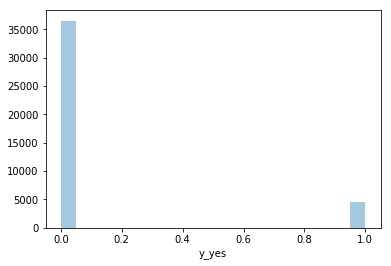

In [103]:
import seaborn as sns

sns_plot = sns.distplot(df_dummies['y_yes'], bins =20, kde = False, rug = False).get_figure()

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

X = df_dummies[features].copy()
y = df_dummies['y_yes'].copy()

#X = df_dummies.values
#y= df_dummies['y_yes'].values.T

clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)

dummy_clf = DummyClassifier()
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))

dummy_clf.fit(X,y)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(y,dummy_clf.predict(X))))


ACC: 0.85 (+/- 0.14)
Dummy ACC: 0.80


In [118]:
print(X.shape)

(41188, 19)


In [119]:
df_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_no,y_yes
0,39,3,1,0,0,0,0,1,6,1,...,26,0,1,8,18,16,287,8,1,0
1,40,7,1,3,1,0,0,1,6,1,...,26,0,1,8,18,16,287,8,1,0
2,20,7,1,3,0,2,0,1,6,1,...,26,0,1,8,18,16,287,8,1,0
3,23,0,1,1,0,0,0,1,6,1,...,26,0,1,8,18,16,287,8,1,0
4,39,7,1,3,0,0,2,1,6,1,...,26,0,1,8,18,16,287,8,1,0


In [120]:
print(y)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_yes, Length: 41188, dtype: uint8


In [121]:
#train the regressor on the whole dataset

clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)
clf.fit(X,y)

print(acc(y,clf.predict(X)))

0.8986840827425464


[18 11 17 14 13 16 15  7  8 12  0  4  3 10  9  2  1  5  6]
Feature ranking:
1. nr.employed (0.208887)
2. pdays (0.185732)
3. euribor3m (0.160852)
4. emp.var.rate (0.125602)
5. poutcome (0.121876)
6. cons.conf.idx (0.054951)
7. cons.price.idx (0.043263)
8. contact (0.036619)
9. month (0.027974)
10. previous (0.014917)
11. age (0.007986)
12. default (0.005513)
13. education (0.001942)
14. campaign (0.001313)
15. day_of_week (0.001302)
16. marital (0.000636)
17. job (0.000283)
18. housing (0.000189)
19. loan (0.000163)


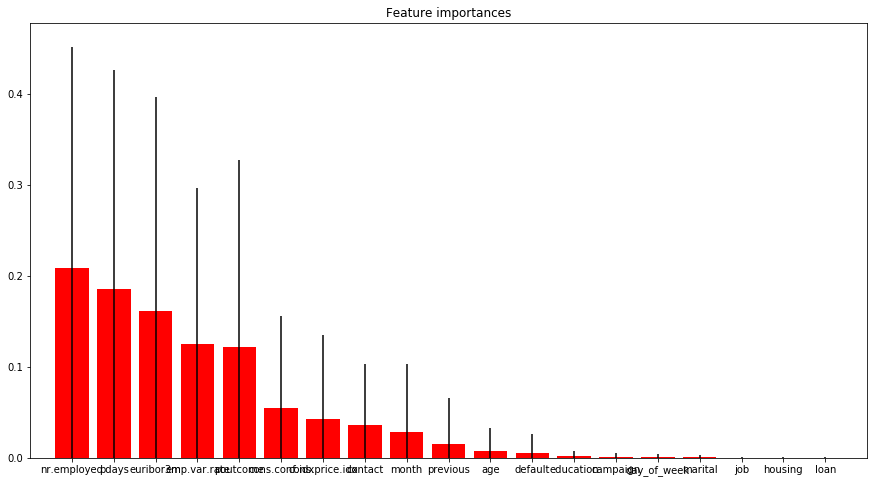

In [122]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')

Normalized confusion matrix


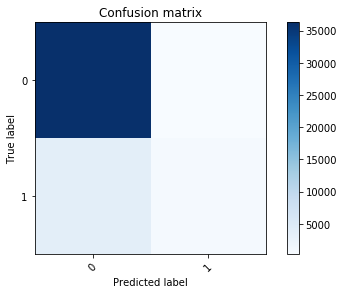

In [123]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion.png",bbox_inches='tight')
plt.savefig("confusion.pdf",bbox_inches='tight')